In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

## Problem Statement

The objective of this case study is to help Jamboree builds intelligence and capabilities using this data that helps them in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

# Data Preprocessing

In [2]:
data=pd.read_csv("Jamboree_dataset.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
cols=list(data.columns)
cols.remove('Serial No.')
cols

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [2]:
data.head()

NameError: name 'data' is not defined

# Univariate , Bivariate and Multivariate analysis

In [81]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [102]:
Research_count=data['Research'].value_counts()

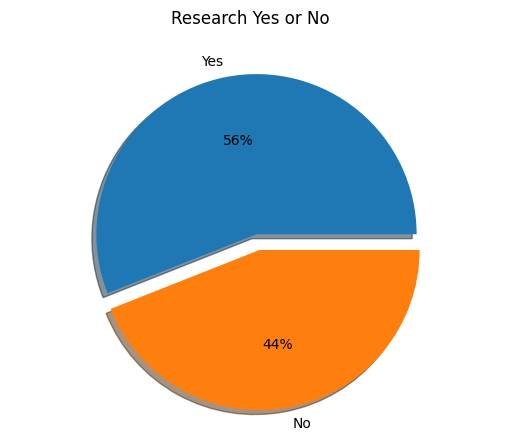

In [79]:
plt.pie(Research_count,labels=['Yes','No'],autopct='%.0f%%',explode=[0,0.1],shadow=True)
plt.axis('equal')
plt.suptitle("Research Yes or No")
plt.show()

In [83]:
Top_University=data.groupby(by='University Rating')['Chance of Admit '].mean().to_frame().reset_index()
# data['University Rating'].value_counts()
Top_University

,University Rating,Chance of Admit
0,1,0.562059
1,2,0.626111
2,3,0.702901
3,4,0.801619
4,5,0.888082


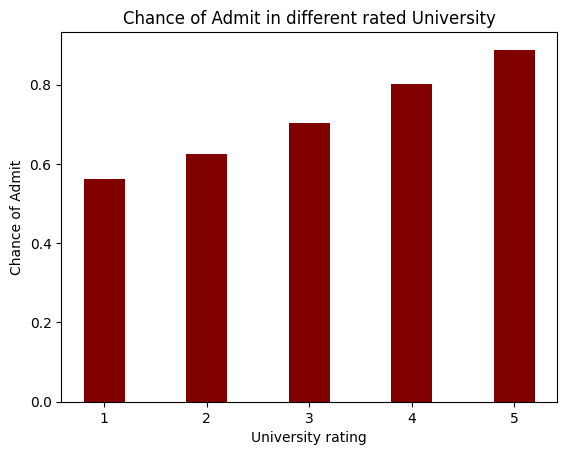

In [85]:
plt.bar(Top_University['University Rating'], Top_University['Chance of Admit '], color ='maroon', width = 0.4)
 
plt.xlabel("University rating")
plt.ylabel("Chance of Admit")
plt.title("Chance of Admit in different rated University")
plt.show()

#####  We can observe that higher the rating of university and higher is the chance of admit.

In [92]:
label=['between 6.8 to 7.5 ','between 7.6 to 8.5','between 8.6 to 9.5','Above 9.5']

In [88]:
minimum_CGPA=data['CGPA'].min()
maximum_CGPA=data['CGPA'].max()
print("The minimum CPGA is : ",minimum_CGPA)
print("The maximum CPGA is : ",maximum_CGPA)

The minimum CPGA is :  6.8
The maximum CPGA is :  9.92


In [93]:
cgpa_df=data.copy()

In [94]:
cgpa_df['bins'] = pd.cut(x=cgpa_df['CGPA'], bins=[0, 7.5, 8.5, 9.5,10],
                      labels=label)


In [101]:
cgpa_counts=cgpa_df['bins'].value_counts()
cgpa_counts

bins
between 8.6 to 9.5     236
between 7.6 to 8.5     213
Above 9.5               31
between 6.8 to 7.5      20
Name: count, dtype: int64

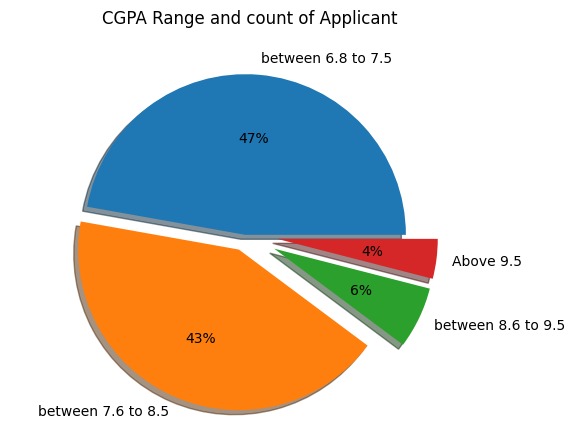

In [106]:
plt.pie(cgpa_counts,labels=label,autopct='%.0f%%',explode=[0,0.1,0.2,0.2],shadow=True)
plt.axis('equal')
plt.suptitle("CGPA Range and count of Applicant")
plt.show()

##### It's visible that people with CGPA between 6.8 to 8.5 are the people who uses JAMBOREE most.

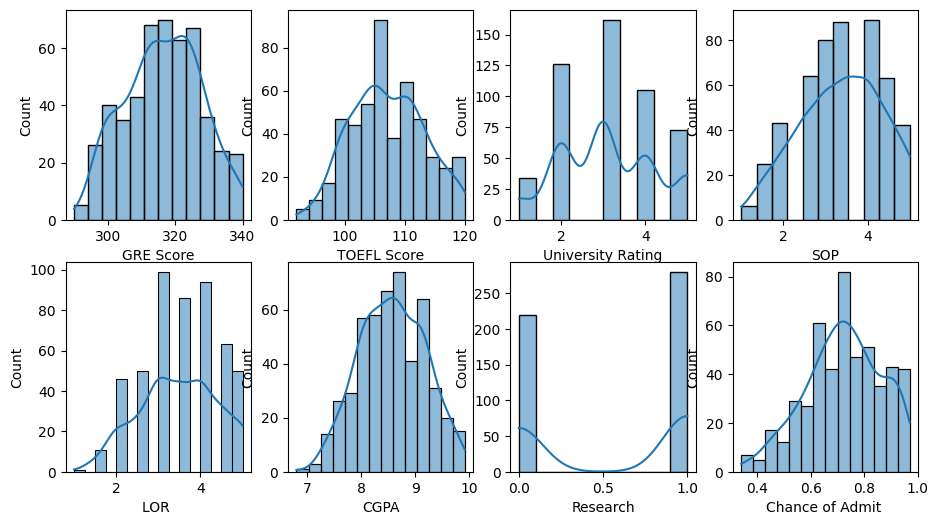

In [9]:
fig,axis=plt.subplots(nrows = 2,ncols = 4,figsize = (11,6))
for i in range(2):
    for j in range(4):
        col=cols[4*i+j]
        plt.xlabel(col)
        sns.histplot(data[col],kde=True,ax=axis[i,j])
plt.show()


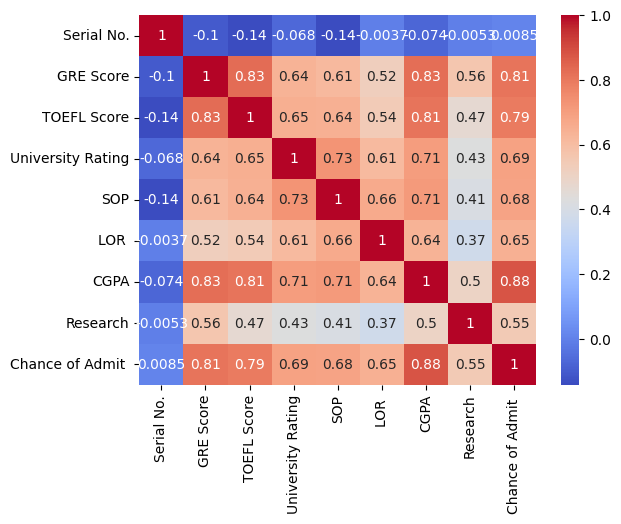

In [10]:
sns.heatmap(data.corr(),annot=True ,cmap="coolwarm" )
plt.show()

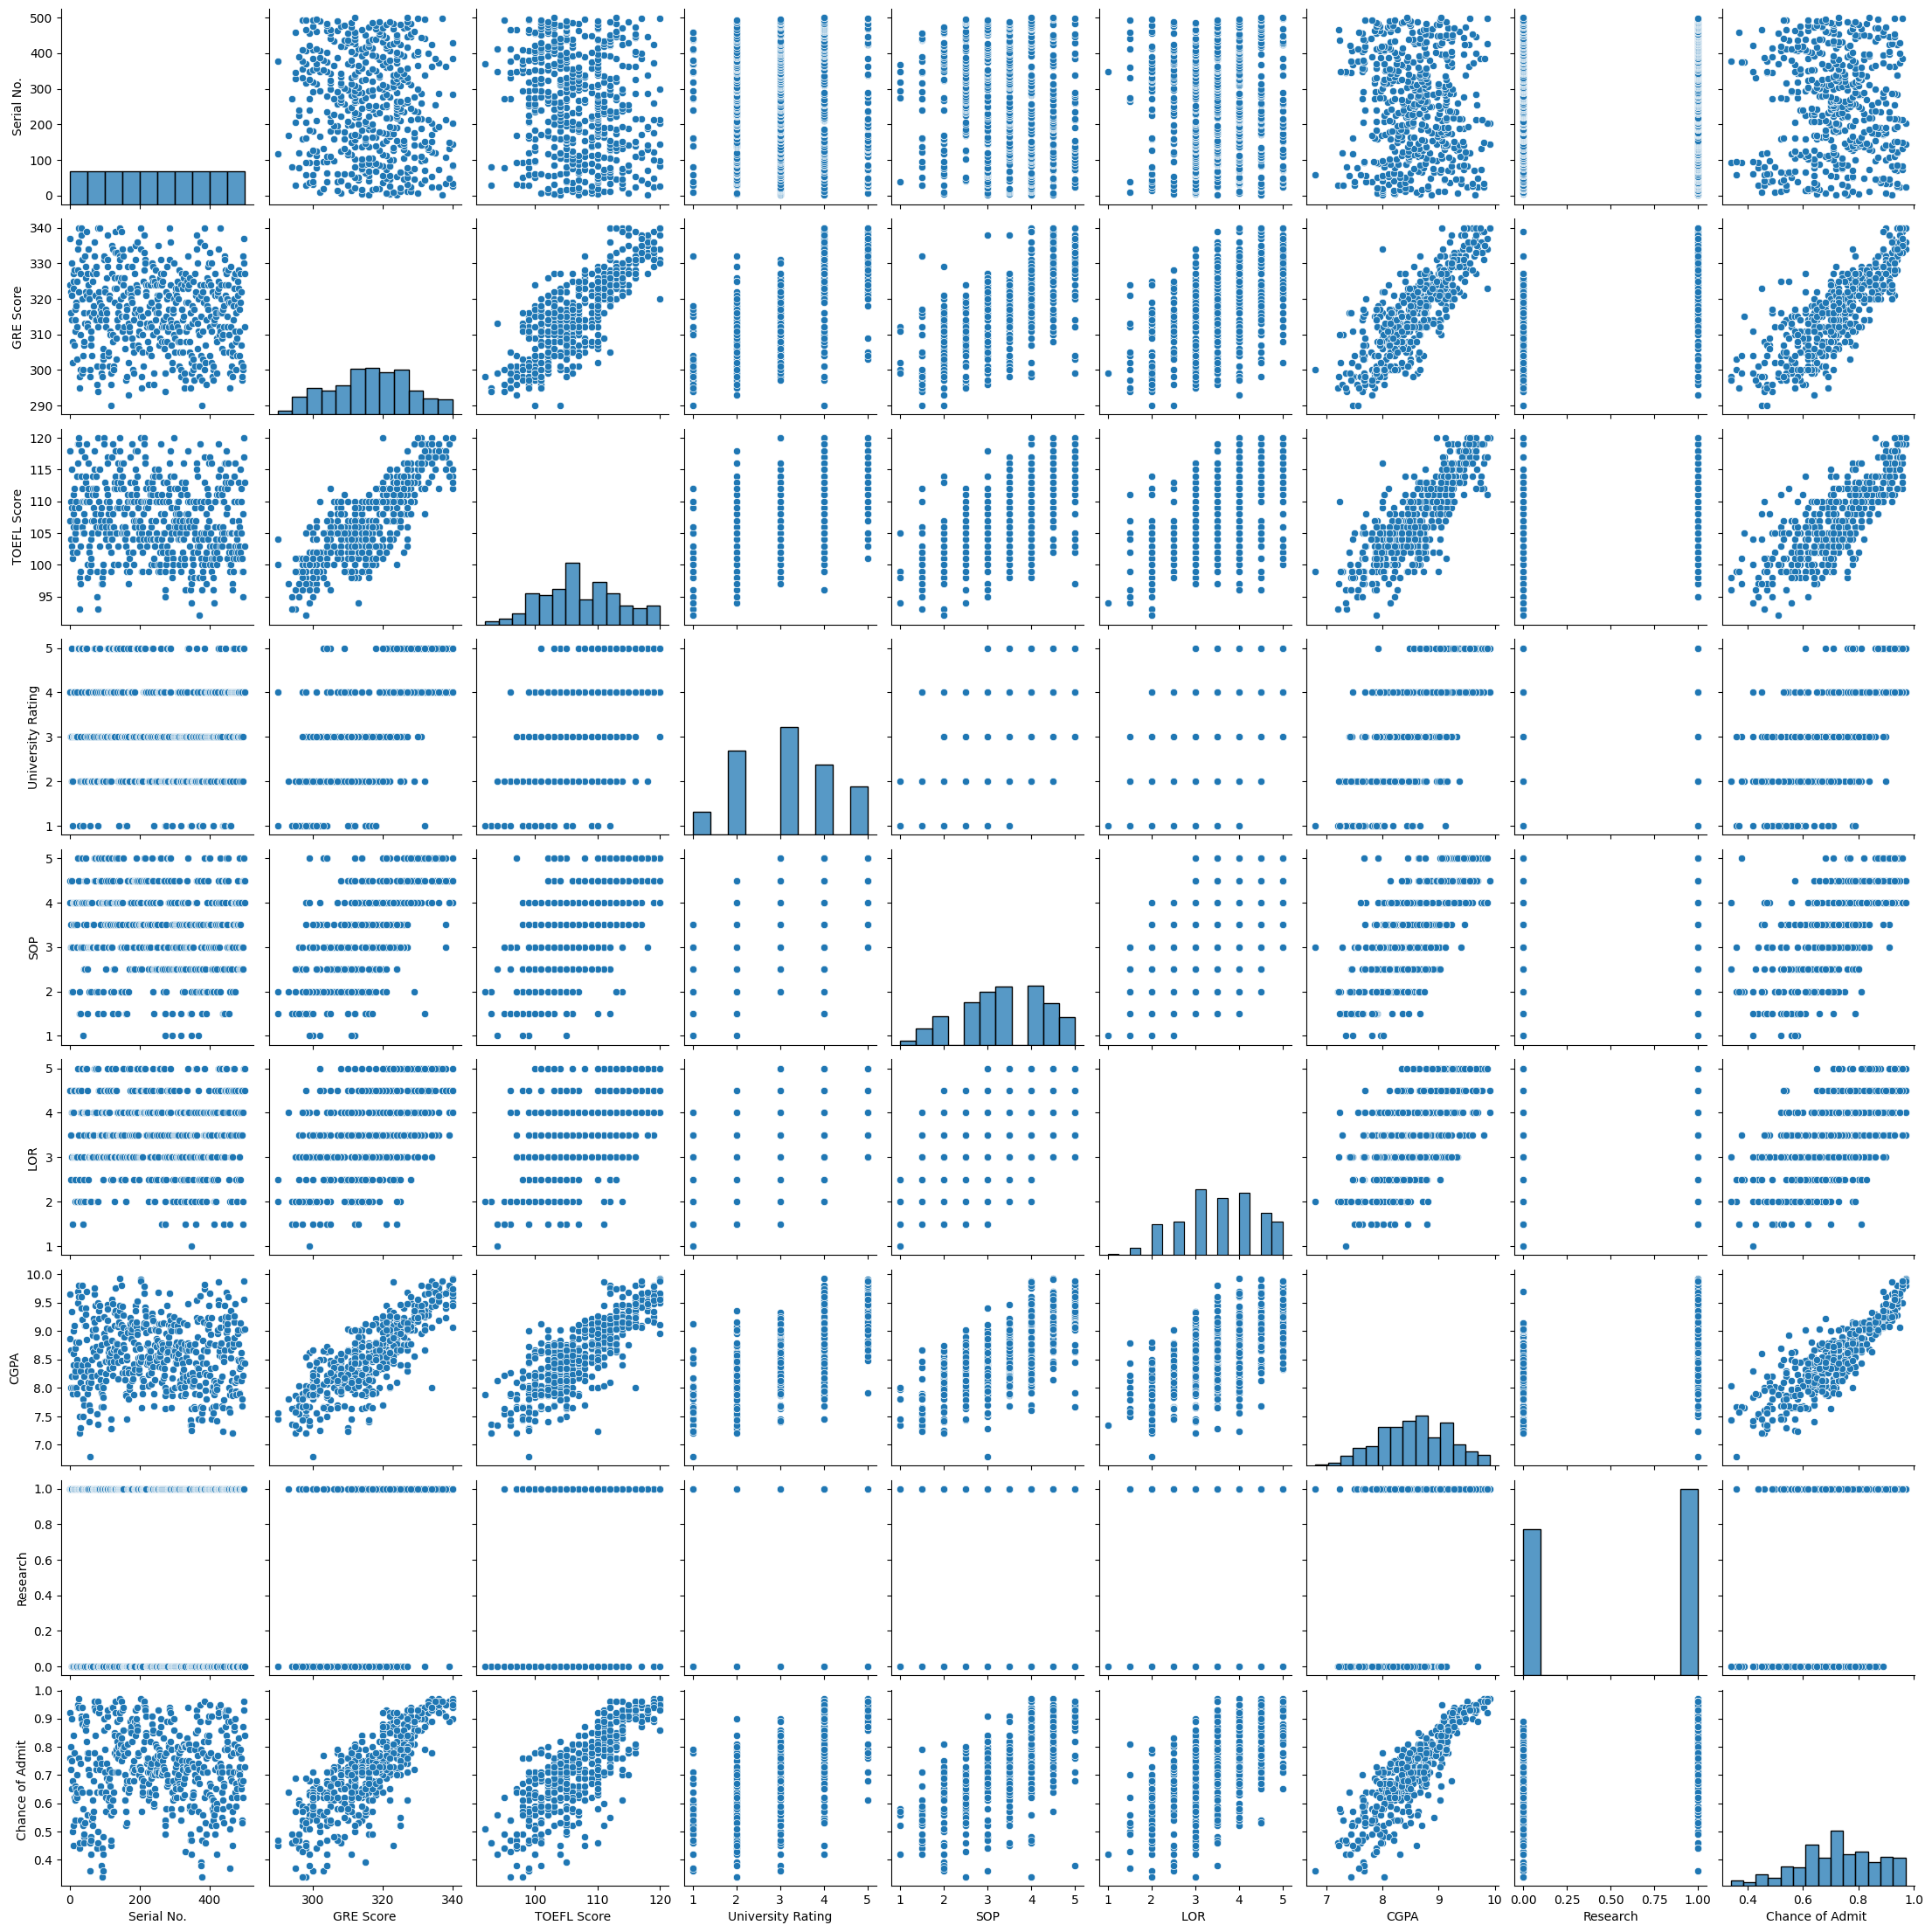

In [61]:
sns.pairplot(data)

# Outliers detection and treatment

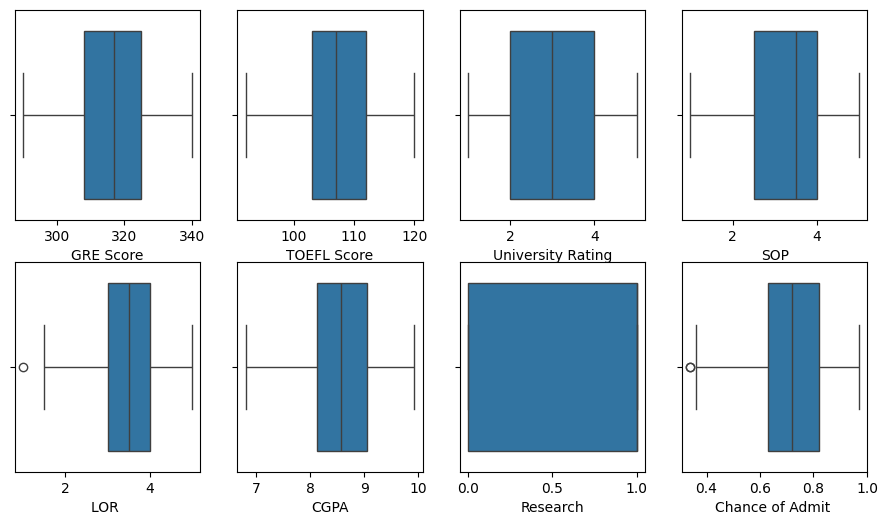

In [11]:
fig,axis=plt.subplots(nrows = 2,ncols = 4,figsize = (11,6))
for i in range(2):
    for j in range(4):
        col=cols[4*i+j]
        plt.xlabel(col)
        sns.boxplot(x=data[col],ax=axis[i,j])
plt.show()

In [12]:
df=data.copy()

In [13]:
def detect_outliers_iqr(df,i):
    q1 = round(np.percentile(df[[i]], 25),3)
    q3 = round(np.percentile(df[[i]], 75),3)
    IQR = q3-q1
    lwr_bound = round(q1-(1.5*IQR),3)
    upr_bound = round(q3+(1.5*IQR),3)
    outliers = df.loc[(df[i] < lwr_bound) | (df[i] > upr_bound)]
    print(f"The total number of outliers in {i} is {outliers.shape[0]}")
   
for i in cols:
    detect_outliers_iqr(df,i)

The total number of outliers in GRE Score is 0
The total number of outliers in TOEFL Score is 0
The total number of outliers in University Rating is 0
The total number of outliers in SOP is 0
The total number of outliers in LOR  is 1
The total number of outliers in CGPA is 0
The total number of outliers in Research is 0
The total number of outliers in Chance of Admit  is 2


In [14]:
df.shape

(500, 9)

##### No outliers are far less so will drop it.

In [15]:
for i in cols:
    q1 = round(np.percentile(df[[i]], 25),3)
    q3 = round(np.percentile(df[[i]], 75),3)
    IQR = q3-q1
    lwr_bound = round(q1-(1.5*IQR),3)
    upr_bound = round(q3+(1.5*IQR),3)
    median=np.median(data[i])
    condition=((df[i] < lwr_bound) | (df[i] > upr_bound))
    df[i]=np.where(condition, median,df[i])

In [16]:
def detect_outliers_iqr(df,i):
    q1 = round(np.percentile(df[[i]], 25),3)
    q3 = round(np.percentile(df[[i]], 75),3)
    IQR = q3-q1
    lwr_bound = round(q1-(1.5*IQR),3)
    upr_bound = round(q3+(1.5*IQR),3)
    outliers = data.loc[(df[i] < lwr_bound) | (df[i] > upr_bound)]
    print(f"The total number of outliers in {i} is {outliers.shape[0]}")
   
for i in cols:
    detect_outliers_iqr(df,i)

The total number of outliers in GRE Score is 0
The total number of outliers in TOEFL Score is 0
The total number of outliers in University Rating is 0
The total number of outliers in SOP is 0
The total number of outliers in LOR  is 0
The total number of outliers in CGPA is 0
The total number of outliers in Research is 0
The total number of outliers in Chance of Admit  is 2


##### The outliers has been replaced with median for all the independent variables.

# Standarisation of data

In [17]:
df.drop(columns=["Serial No."],inplace=True)
scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.101533,1.776806,0.886405,1.416328
1,0.667148,-0.031601,0.775582,0.632315,1.101533,0.485859,0.886405,0.264491
2,-0.041830,-0.525364,-0.099793,-0.377773,0.011985,-0.954043,0.886405,-0.023469
3,0.489904,0.462163,-0.099793,0.127271,-1.077563,0.154847,0.886405,0.552450
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.532789,-0.606480,-1.128152,-0.527398


In [18]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,1.762146e-15,1.136868e-15,1.421085e-16,-8.526513e-17,1.421085e-16,3.119283e-15,-7.815970e-17,-1.065814e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-2.346008e+00,-2.500419e+00,-1.850542e+00,-2.397950e+00,-2.167110e+00,-2.940115e+00,-1.128152e+00,-2.615103e+00
25%,-7.508077e-01,-6.899523e-01,-9.751676e-01,-8.828175e-01,-5.327888e-01,-7.430227e-01,-1.128152e+00,-6.173848e-01
50%,4.679255e-02,-3.160087e-02,-9.979274e-02,1.272712e-01,1.198502e-02,-2.720919e-02,8.864053e-01,-2.346869e-02
75%,7.557706e-01,7.913384e-01,7.755821e-01,6.323155e-01,5.567589e-01,7.672196e-01,8.864053e-01,6.964296e-01
max,2.085104e+00,2.108041e+00,1.650957e+00,1.642404e+00,1.646307e+00,2.223672e+00,8.864053e-01,1.776277e+00


# Data Preparation (train-test split)

In [19]:
y=df1['Chance of Admit ']
X=df1.drop('Chance of Admit ',axis=1)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# Model Building

In [21]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Coefficient of the model

In [22]:
coefficient=model.coef_
coefficient

array([0.13417058, 0.15812728, 0.09105013, 0.00237155, 0.07872378,
       0.45238729, 0.09910044])

##### Intercept of model

In [23]:
intercept=model.intercept_
intercept

0.02106502965307642

In [24]:
coef_df = pd.DataFrame(coefficient,X_train.columns,columns = ["Coefficients"])
coef_df.sort_values(by='Coefficients',ascending=False)

,Coefficients
CGPA,0.452387
TOEFL Score,0.158127
GRE Score,0.134171
Research,0.099100
University Rating,0.091050
LOR,0.078724
SOP,0.002372


##### From the weights of our linear model, we can see that the most important feature in our model is CGPA, then followed by TOEFL Score and GRE Score.

##### Also the least important features are Research,LOR,SOP. All these have least magnitude of their weights.

#### Y hat i.e y_prediction

In [25]:
y_hat=model.predict(X_test)

In [26]:
y_test.shape

(150,)

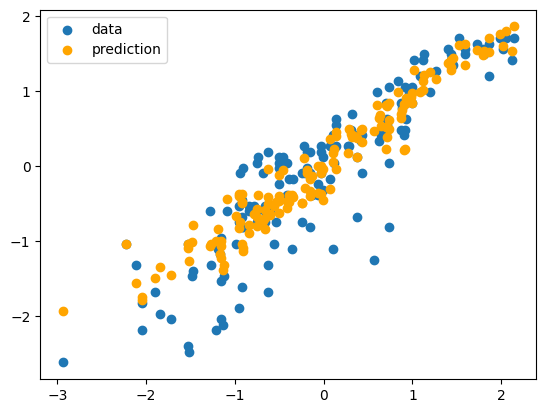

In [27]:
plt.scatter(X_test['CGPA'],y_test,label='data')
plt.scatter(X_test['CGPA'],y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

### Model Evaluation

##### Error Evaluation

In [28]:
error=y_hat-y_test
# MSE_error

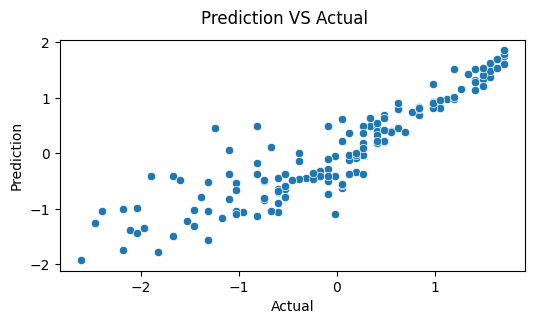

In [29]:
plt.figure(figsize=(6,3))
sns.scatterplot(x=y_test,y=y_hat)
plt.ylabel("Prediction")
plt.xlabel("Actual")
plt.suptitle("Prediction VS Actual")
plt.show()

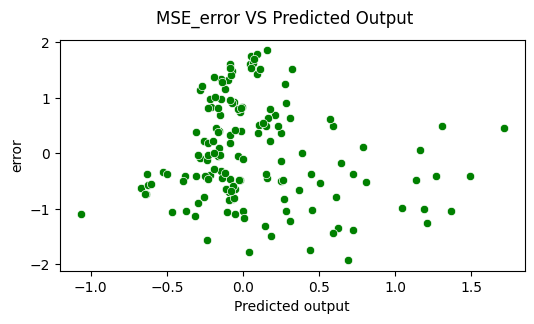

In [30]:
plt.figure(figsize=(6,3))
sns.scatterplot(x=error,y=y_hat,color='green')
plt.ylabel("error")
plt.xlabel("Predicted output")
plt.suptitle("MSE_error VS Predicted Output")
plt.show()

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

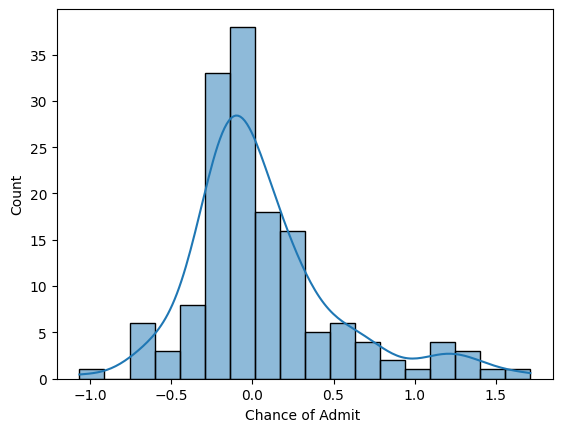

In [31]:
sns.histplot(error,kde=True)

##### Squared Error

In [32]:
MSE_Error=np.mean(np.square(error))
R2=model.score(X_test,y_test)
Adj_R2= 1 - ( 1-R2) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )

In [33]:
print("Mean Squared Error :",MSE_Error)
print("R Squared value :",R2)
print("Adjusted R squared value :",Adj_R2)

Mean Squared Error : 0.20808057297576615
R Squared value : 0.8128907004638759
Adjusted R squared value : 0.803667002599419


###### R2 value is 0.813 and its in the range of [0.8,1] so it would be considered a Good model. It shows howw much variance is captured by regression line. Adjuste R2 in this range also suggest the same.

# Summary using Stats model

In [34]:
# X_train,X_test,y_train,y_test already with us
X_sm=sm.add_constant(X_train)    #adding constant 
model1=sm.OLS(y_train,X_sm)
result=model1.fit()

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     210.3
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          8.54e-120
Time:                        15:33:08   Log-Likelihood:                -195.72
No. Observations:                 350   AIC:                             407.4
Df Residuals:                     342   BIC:                             438.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0211      0.02

##### We can observe p value for all the independent variabke w.r.t to dependent variable.

Null Hypothesis(H0) : Independent variable has not impact on dependent variable.

Alternate Hypothesis(Ha) : Independent variable has impact on dependent variable.

We can observe p-value is less than 0.05 for all the features except for the SOP. since p-value is less than 0.05 so we will reject the Null hypothesis.
That means all the features except SOP has an impact on dependent variable.

##### Lets check model efficiency if SOP is not considered for Linear regression.

In [36]:
X_train_new=X_train.drop(columns='SOP')

In [37]:
X_train_new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [38]:
# X_train,X_test,y_train,y_test already with us
X_sm_new=sm.add_constant(X_train_new)    #adding constant 
model2=sm.OLS(y_train,X_sm_new)
result1=model2.fit()

In [39]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     246.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          5.23e-121
Time:                        15:33:08   Log-Likelihood:                -195.73
No. Observations:                 350   AIC:                             405.5
Df Residuals:                     343   BIC:                             432.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0211      0.02

##### Although the difference between them is not very visible. Although std error has been slightly decreased and weights has been strengthen but by a very small magnitute.

## Hyperparameter & Regularisation

### LASSO REGRESSION

In [54]:
# Defining our performance metric
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [51]:
train_scores = []
test_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
scaler = StandardScaler()
for rate in rate_list:
  lasso_model = Lasso(alpha=rate)
  lasso_model.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, lasso_model.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, lasso_model.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

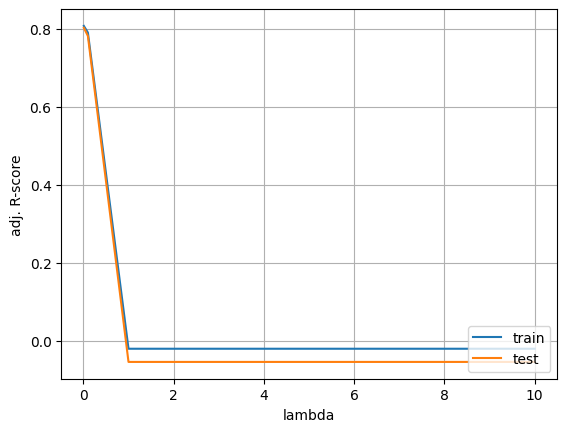

In [52]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [53]:
Lasso_adjR2=pd.DataFrame(test_scores,rate_list,columns= ['Adj_R2'])
Lasso_adjR2

,Adj_R2
0.01,0.802643
0.10,0.781703
1.00,-0.054270
5.00,-0.054270
10.00,-0.054270


##### Optimal lanbda would be 0.01.

### RIDGE REGRESSION

In [43]:
# Defining our performance metric
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [44]:
train_scores = []
test_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
scaler = StandardScaler()
for rate in rate_list:
  ridge_model = Ridge(alpha=rate)
  ridge_model.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, ridge_model.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, ridge_model.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

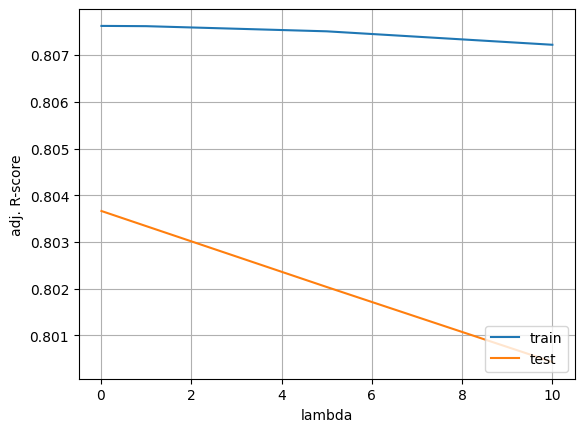

In [45]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [50]:
Ridge_adjR2=pd.DataFrame(test_scores,rate_list,columns= ['Adj_R2'])
Ridge_adjR2

,Adj_R2
0.01,0.803664
0.10,0.803634
1.00,0.803341
5.00,0.802038
10.00,0.800434


##### Optimal lambda would be around 0.01

# Assumptions of Linear Regression

### Linearity

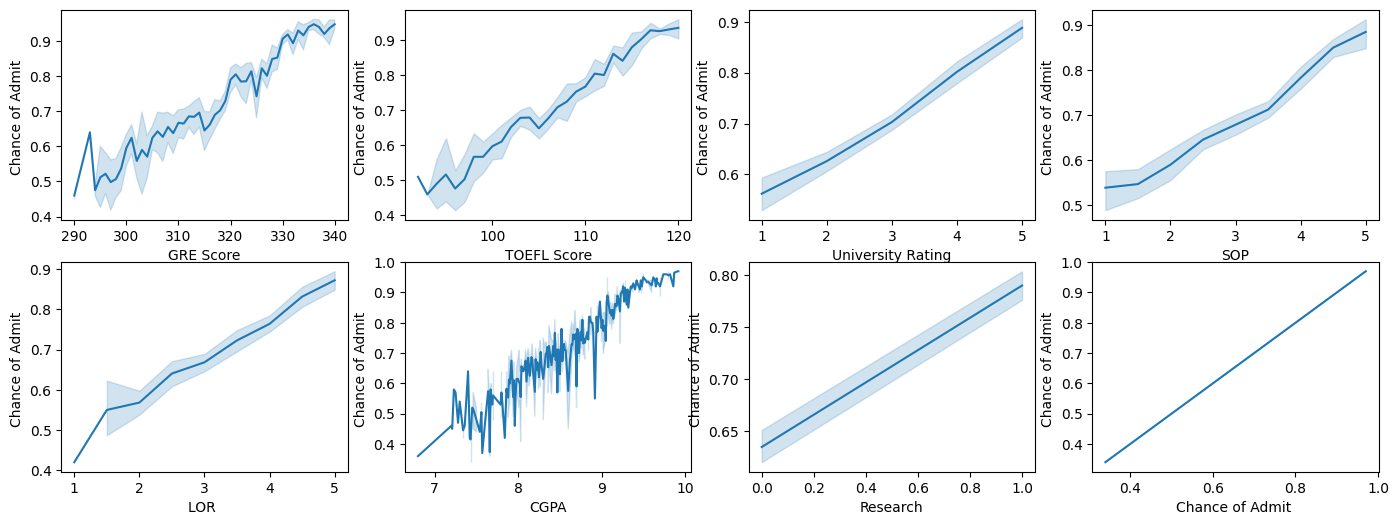

In [41]:
fig,axis=plt.subplots(nrows = 2,ncols = 4,figsize = (17,6))
for i in range(2):
    for j in range(4):
        col=cols[4*i+j]
        sns.lineplot(data=data,x=col,y='Chance of Admit ',ax=axis[i,j])
        plt.xlabel(col)
plt.show()

##### There is a linear relationship between all the features and chance of admit.

### Check for multicollinearity

In [42]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values("VIF",ascending = False)
vif

,Features,VIF
5,CGPA,4.77
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.82
2,University Rating,2.62
4,LOR,1.99
6,Research,1.49


##### There is no multicollinearity since all the VIF score is small. So we are not going to drop any features.

### Residuals Distribution

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

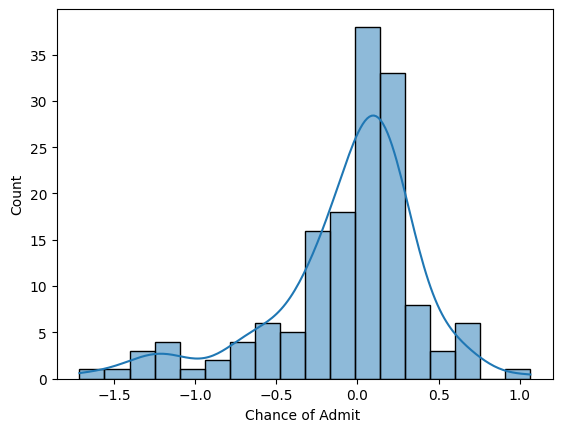

In [55]:
sns.histplot(y_test-y_hat,kde = True)

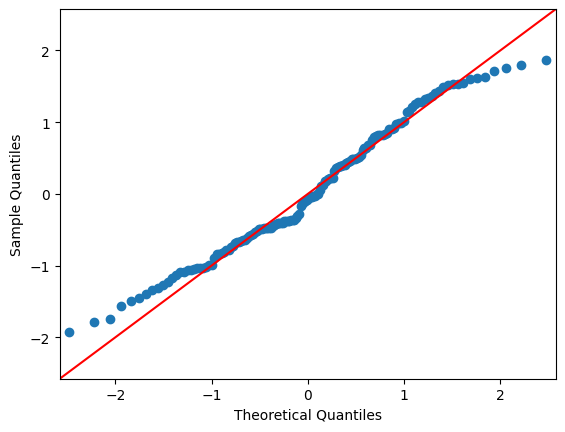

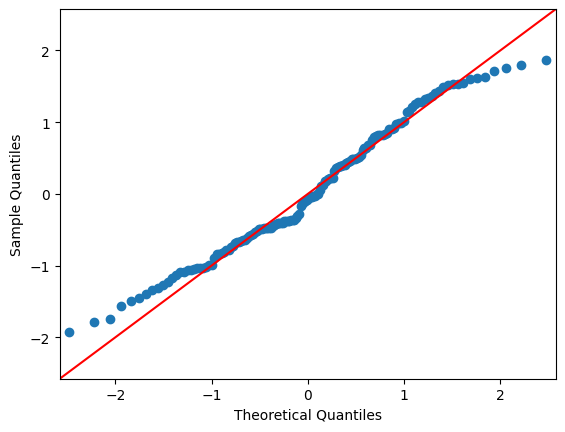

In [111]:
sm.qqplot(y_hat, line ='45')

##### Histogram plot of residuals shows that it is approximately normally distributed. However it is left skewed, which means their must be some extra features missing or needed for better model training.
Points in qq plot are almost on the same line

### No Outliers

 All outliers has been handles already. so no outliers.

### Mean of Residuals

In [107]:
mean_of_residuals = np.mean(y_test - y_hat)
mean_of_residuals

-0.07021676551026124

The mean of residuals is nearly zero

### No heteroskadasticity

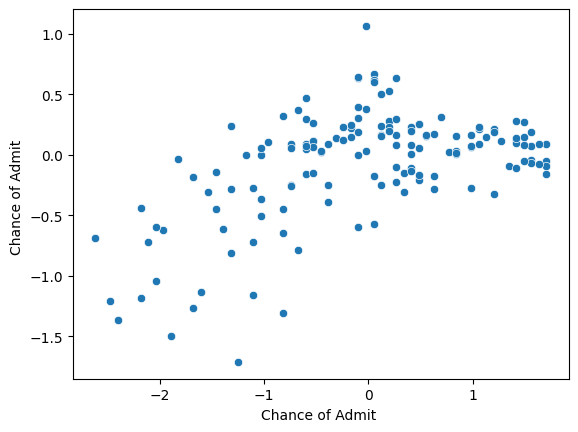

In [109]:
sns.scatterplot(x=y_test,y=y_test-y_hat)
plt.show()

##### No heteroskadasticity since there is not pattern here with residuals when y_test is increasing.

# Business Insights

1. People with research background are more in datset although the difference is not that great.
2. Dataset has CGPA between 6.8 to 9.99 and people having CGPA between 6.8 to 8.5 are the people who uses this platform most.
3. We observed that higher the rating of university and higher is the chance of admit.
4. High correlation betwen GRE and TOEFL score meaning people having score in one also scores higher in other.
5. High correlation between CGPA and chance of admit.
6. There was not much outliers in the data.

# Recommendations

1. CGPA Score, GRE Score, University Rating are the top three most impacting parameters in Admission to colleges followed by LOR, TOEFL and Research scores.
2. SOP has very little impact on chance of Admit. so it can removed in linear regression model.
3. People having CGPA withing range 6.8 to 8.5 are the people who uses this platform for college admition. So Jamboree can identify people and use ads to target people within this CGPA range.
4. Model can be improved by introducting new features like score in mock tests.
5. Histogram plot of residuals shows that it is approximately normally distributed. However it is left skewed, which means their must be some extra features missing or needed for better model training. Jamboree should add more features for evaluation of chance of admit. so the data can come more closer to normal.
6. Since higher score in GRE and TOEFL results in higher chance of admission so Jamboree should come up with some course to help people get more marks. It can also earn profit with this.